## Introduction

## Theory

## Method
assign each team a bracket of points

## Results


In [29]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.cluster
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [30]:
df=pd.read_csv("../data/01-modified-data/team_pp_data_point_bracket_clean.csv")
print(df.shape)

label = df['points_cat'].copy()
df=df.drop(columns=['Unnamed: 0','points_cat'])
df_embedded=TSNE(n_components=2,learning_rate='auto',init='random',perplexity=15).fit_transform(df)

features=df.columns
feature_matrix = df[features].copy()

(32, 10)


### KMEAN

In [31]:
K=range(1,11)
distortions=[]
inertias=[]

for k in K:
    model=sklearn.cluster.KMeans(n_clusters=k).fit(df_embedded)
    model.fit(df_embedded)

    inertias.append(model.inertia_)
    distortions.append(sum(np.min(cdist(df_embedded, model.cluster_centers_, 'euclidean'), axis=1)) / df_embedded.shape[0])

/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

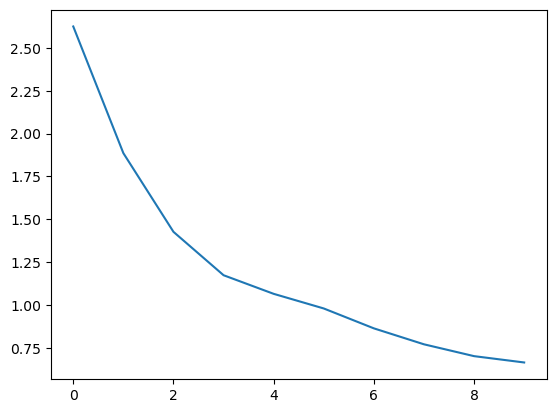

In [32]:
K=[1,2,3,4,5,6,7,8,9,10]


df2=pd.DataFrame(
    {'K': K,
     'distortions': distortions,
     'inertias': inertias
     }
)
plt.plot(df2['distortions'])
plt.show()

### DBSAN

In [33]:
nmax=10
sil_max=0
df3=np.ascontiguousarray(df_embedded)

params=[]
sil_scores=[]
for k in range(2,nmax+1):
    param=0.25*(k-1)
    model=sklearn.cluster.DBSCAN(eps=param,min_samples=2).fit(df3)
    labels=model.labels_

    params.append(param)
    sil_scores.append(sklearn.metrics.silhouette_score(df3,labels))

    if (sil_scores[-1]>sil_max):
        opt_param=param
        sil_max=sil_scores[-1]
        opt_labels=labels

fig, ax = plt.subplots()
ax.plot(params, sil_scores, "-o")
ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
plt.show()

print("OPTIMAL PARAMETER=", opt_param)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### Hierarchical clustering


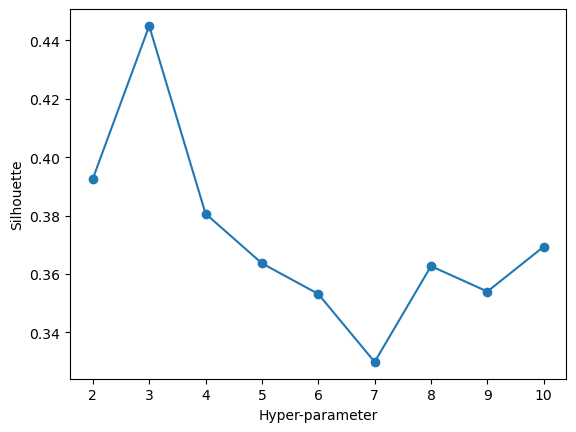

OPTIMAL PARAMETER= 3


In [34]:
nmax=10
sil_max=0
df4=np.ascontiguousarray(df_embedded)

params=[]
sil_scores=[]
for k in range(2,nmax+1):
    model=sklearn.cluster.AgglomerativeClustering(n_clusters=k).fit(df4)
    labels=model.labels_

    sil_scores.append(sklearn.metrics.silhouette_score(df4, labels))
    params.append(k)

    if(sil_scores[-1]>sil_max):
        opt_param=k
        sil_max=sil_scores[-1]
        opt_labels=labels

fig, ax = plt.subplots()
ax.plot(params, sil_scores, "-o")
ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
plt.show()


print("OPTIMAL PARAMETER=", opt_param)

### Clustering the data

/Users/gracehyland/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


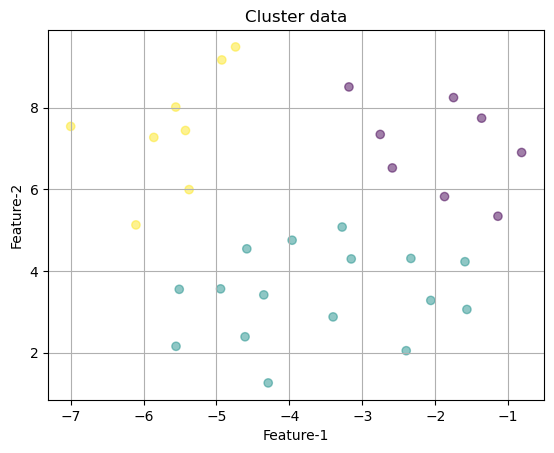

In [41]:
model=sklearn.cluster.KMeans(n_clusters=3).fit(df_embedded)
labels=model.predict(df_embedded)

fig, ax = plt.subplots()
ax.scatter(df_embedded[:,0], df_embedded[:,1],c=labels, alpha=0.5) 
ax.set(xlabel='Feature-1', ylabel='Feature-2',
title='Cluster data')
ax.grid()
plt.show()

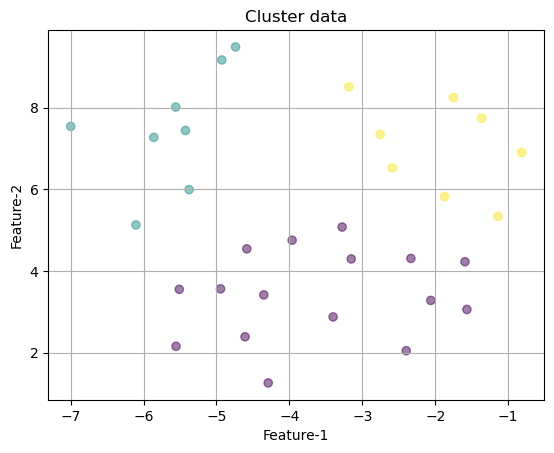

In [42]:
model = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(df_embedded)
labels=model.labels_

fig, ax = plt.subplots()
ax.scatter(df_embedded[:,0], df_embedded[:,1],c=labels, alpha=0.5) 
ax.set(xlabel='Feature-1', ylabel='Feature-2',
title='Cluster data')
ax.grid()
plt.show()

## Conclusions